# Visualizing $G(T,P)$
### Neshyba, 2021

## Introduction
Here, we're going to construct $G(T,P)$ for various phases of water. How do we do that? One strategy is by integrating the differential equation of state for the Gibbs energy,

$$
dG = -S dT + V dP \ \ \ \ (1)
$$

That might seem like a lot of work, but we already have a lot of the tools for this: we know how to construct $S(T,P)$ from *its* slopes (see *Cruising through $S(T,P)$*), and we have expressions for the volume of water in its various phases too. And we have code that does the integration over temperature and pressure state space. So why not?

## Learning Goals
- Gain familiarity with what the Gibbs energy thermodynamic surface looks like in a temperature-pressure state space
- Recognize the relationship between the *intersection of Gibbs energy* surfaces (liquid and gas) and the *Clausius-Clapeyron* equation. 

In [1]:
# Import resources
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
# from mpl_toolkits.mplot3d import axes3d


import matplotlib
matplotlib.use('Qt5Agg')
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


In [2]:
%matplotlib notebook

In [3]:
x, y, z, value = np.random.random((4, 40))
mlab.points3d(x, y, z, value)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

### T,P state space
In the cell below, lay out a T,P state space with the following specifications:

- Temperature should run from 273 K to 400 K (and have at least 100 points)
- Pressure should runn from 1000 Pa to 200000 Pa (also at least 100 points)

Also, attach units to each.

In [4]:
# Laying out the state space
### BEGIN SOLUTION
Tgrid, Pgrid = PL.Statespace([273,400,100],[1000,200000,101])
### END SOLUTION

# Attach units to Tgrid (K) and Pgrid (Pa)
### BEGIN SOLUTION
Pgrid = AssignQuantity(Pgrid,'Pa')
Tgrid = AssignQuantity(Tgrid,'K')
### END SOLUTION

### Some general-purpose constants
Values in the cell below correspond to "standard state" conditions.

In [5]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J /mol/K')

# Standard state conditions, in SI units
T0 = AssignQuantity(298,'K')
P0 = AssignQuantity(1e5,'pascal')

### Constants pertaining to water
The following cell provides constants for three phases of water - See https://webbook.nist.gov/chemistry/name-ser/ for standard-state entropy values. 

In [6]:
# Some SI units related to entropy
EUnits = 'J/K/mol'
dSdTUnits = 'J / kelvin^2 /mole'
dSdPUnits = 'meter ** 3 / kelvin / mole'
EnergyUnits = 'J/mol'

# Molar mass of water
M = AssignQuantity(0.018,'kg/mol')

# Parameters for gaseous water
Vgrid_gas = R*Tgrid/Pgrid
CP_gas = AssignQuantity(33.6,EUnits)
SS_gas = [T0,P0,AssignQuantity(188.835,EUnits)] # The standard state entropy
GS_gas = [T0,P0,AssignQuantity(-228600,'J/mol')] # The standard state Gibbs energy

# Parameters for liquid water
Vgrid_liq = AssignQuantity(18e-6,'m^3 /mol')*np.ones(np.shape(Pgrid)) # Molar volume, as a state-space grid
alpha_P_liq = AssignQuantity(2.1e-4,'1/K') # Thermal expansivity
CP_liq = AssignQuantity(75.4,EUnits) # Heat capacity
SS_liq = [T0,P0,AssignQuantity(69.95,EUnits)] # The standard state entropy
GS_liq = [T0,P0,AssignQuantity(-237100,EnergyUnits)] # The standard state Gibbs energy

### Calculating $\big (\partial S/ \partial T \big )_P$ for gaseous and liquid water
Below, calculate $\big (\partial S_{gas}/ \partial T \big )_P$ and $\big (\partial S_{liq}/ \partial T \big )_P$.

Hint: See Eq. (2) in *Cruising through $S(T,P)$*.

In [7]:
# dSdT for the gas; call the result dSdT_gas
### BEGIN SOLUTION
dSdT_gas = CP_gas/Tgrid
### END SOLUTION

# dSdT for the liquid; call the result dSdT_liq
### BEGIN SOLUTION
dSdT_liq = CP_liq/Tgrid
### END SOLUTION

### Calculating $\big (\partial S/ \partial P \big )_T$  for gaseous and liquid water
Below, calculate $\big (\partial S_{gas}/ \partial P \big )_T$ and $\big (\partial S_{liq}/ \partial P \big )_T$.

Hint: See Eqs. (3)-(5) in *Cruising through $S(T,P)$*.

In [8]:
# dSdP for the gas; call the result dSdP_gas
### BEGIN SOLUTION
dSdP_gas = -R/Pgrid
### END SOLUTION

# dSdP for the liquid; call the result dSdP_liq
### BEGIN SOLUTION
dSdP_liq = -Vgrid_liq*alpha_P_liq
### END SOLUTION

### Integrating the differential equation of state for entropy
Below, we use the same state-space integrator we used in *Cruising through $S(T,P)$*) to calculate and display the entropy of water.

In [9]:
# Calculate the entropy of the gas, liquid, and solid as thermodynamic surfaces
S_gas = PL.Integrator([Tgrid, Pgrid], dSdT_gas, dSdP_gas, AssignQuantity, Units=EUnits, SState=SS_gas)
S_liq = PL.Integrator([Tgrid, Pgrid], dSdT_liq, dSdP_liq, AssignQuantity, Units=EUnits, SState=SS_liq)

Assigning units: J/K/mol
Assigning units: J/K/mol


/Users/nesh/Documents/Repositories/pypchem/Thermo 2022 (Neshyba)/Week_12a.VisualizingG/PchemLibrary.py:136: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y
/Users/nesh/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/nesh/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  nx, tx, ny, ty, c, fp, ier = dfitpack.regrid_smth(x, y, z, xb, xe, yb,


### Integrating the differential equation of state for the Gibbs energy
In the cell below, we calculate the $G(T,P)$ thermodynamic surface of water vapor by integrating $dG = -S_{gas}dT+V_{gas}dP$.

In [10]:
G_gas = PL.Integrator([Tgrid, Pgrid], -S_gas, Vgrid_gas, AssignQuantity, Units=EnergyUnits, SState=GS_gas)

Assigning units: J/mol


### Your turn: Calculating $G(T,P)$ for the liquid
In the cell below, calculate $G(T,P)$ of liquid water by integrating $dG = -S_{liq}dT+V_{liq}dP$. Don't forget to specify the standard-state Gibbs energy of the liquid!

In [11]:
### BEGIN SOLUTION
G_liq = PL.Integrator([Tgrid, Pgrid], -S_liq, Vgrid_liq, AssignQuantity, Units=EnergyUnits, SState=GS_liq)
### END SOLUTION

Assigning units: J/mol


### Visualizing $G(T,P)$


In [51]:
offset = np.min(G_gas.magnitude)
difference = np.max(G_gas.magnitude) - np.min(G_gas.magnitude); print(difference)

test = (G_gas.magnitude-offset)*1.001 - (G_gas.magnitude-offset)
difference = np.max(test) - np.min(test); print(difference)

print(np.max(G_gas.magnitude))
print(np.min(G_gas.magnitude))

36873.32699733379
36.87332699733088
-222765.03156332686
-259638.35856066065


<IPython.core.display.Javascript object>


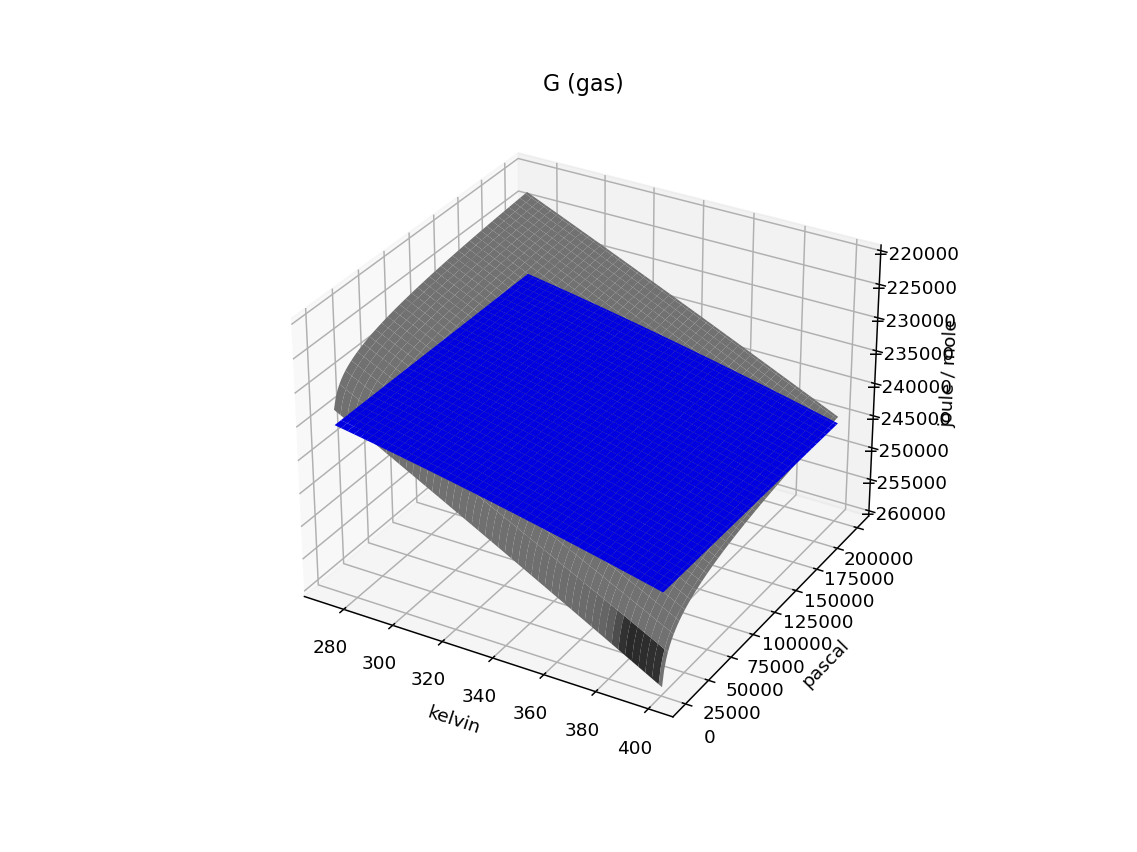

Text(0.5, 0.92, 'G (gas)')

In [48]:
# Plot the gas and liq G together
ax = PL.plot_surface(Tgrid, Pgrid, G_gas, color='gray')
PL.plot_surface(Tgrid, Pgrid, G_liq, color='blue', overlay=True, ax=ax)
ax.set_xlabel(str(Tgrid.units))
ax.set_ylabel(str(Pgrid.units))
ax.set_zlabel(str(G_gas.units))
ax.set_zlim(myzlim)
ax.set_title('G (gas)')

In [64]:
# Set limits
myzlim = [-260000, -220000]


# Plot them together
mlab.figure()
# mlab.surf(Tgrid.magnitude, Pgrid.magnitude, G_gas.magnitude, extent=[280,400,0,200000,-260000, -220000])
# mlab.surf(Tgrid.magnitude, Pgrid.magnitude, G_liq.magnitude, warp_scale='auto')
# mlab.surf(Tgrid.magnitude, Pgrid.magnitude, -G_liq.magnitude, warp_scale='auto')
# mlab.surf(Tgrid.magnitude, Pgrid.magnitude, G_gas.magnitude, warp_scale='auto')
mlab.outline()
#mlab.surf(Tgrid.magnitude, Pgrid.magnitude, (G_gas.magnitude-offset+10), warp_scale='auto')
# ax = PL.plot_surface(Tgrid, Pgrid, G_gas, color='gray')
# ax = PL.plot_surface(Tgrid, Pgrid, G_liq, color='blue', overlay=True,ax=ax)
# ax.set_xlabel(str(Tgrid.units))
# ax.set_ylabel(str(Pgrid.units))
# ax.set_zlabel(str(G_liq.units))
# ax.set_zlim(myzlim)
# ax.set_title('G (liq=blue, gas=gray)')

Cannot contour: No scalars in input data!


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [24]:
help(mlab.surf)

Help on function the_function in module mayavi.tools.helper_functions:

the_function(*args, **kwargs)
    Plots a surface using regularly-spaced elevation data supplied as a 2D
    array.
    
    **Function signatures**::
    
        surf(s, ...)
        surf(x, y, s, ...)
        surf(x, y, f, ...)
    
    s is the elevation matrix, a 2D array, where indices along the first
    array axis represent x locations, and indices along the second array
    axis represent y locations.
    
    x and y can be 1D or 2D arrays such as returned by numpy.ogrid or
    numpy.mgrid. Arrays returned by numpy.meshgrid require a transpose
    first to obtain correct indexing order.
    The points should be located on an orthogonal grid (possibly
    non-uniform). In other words, all the points sharing a same
    index in the s array need to have the same x or y value. For
    arbitrary-shaped position arrays (non-orthogonal grids), see the mesh
    function.
    
    If only 1 array s is passed, the 

<IPython.core.display.Javascript object>


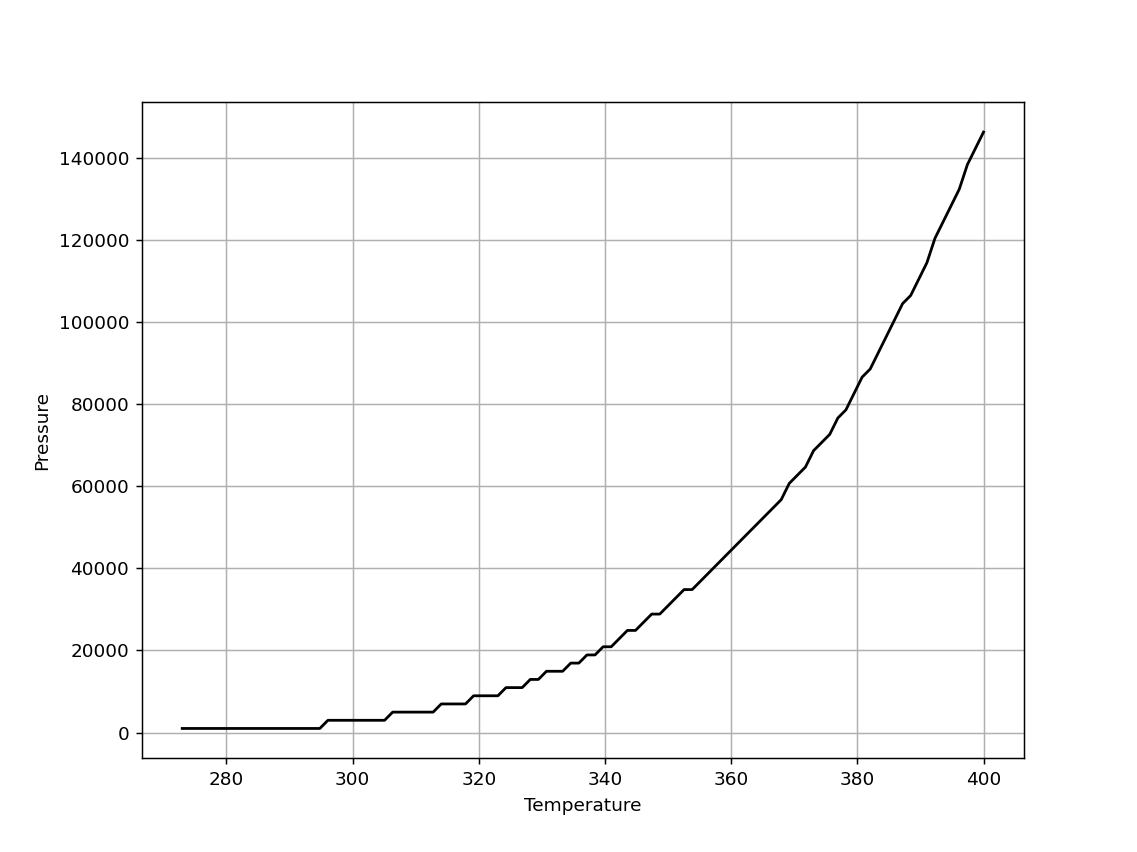

/Users/nesh/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


In [14]:
# This gets the locus of points where they intersect
G_diff2 = (G_gas-G_liq)**2
Temperatures = Tgrid[:,0]
iPlist = []
for i in range(len(Temperatures)):
    iP = np.argmin(G_diff2[i,:])
    iPlist.append(iP)
Pressures = AssignQuantity([],'pascal')
Gvals = AssignQuantity([],'joule/mol')
for i in range(len(Temperatures)):
    j = iPlist[i]
    Pressures = np.append(Pressures,Pgrid[0,j])
    Gvals = np.append(Gvals,G_gas[i,j])

# This makes a 2d plot    
plt.figure()
plt.plot(Temperatures,Pressures,color='black')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)

### Pause for analysis
The last graph displayed above shows the locus of points (pressure and temperature) at which the Gibbs energy of the gas equals that of the liquid. What you see should look a lot like the Clausius-Clapeyron equation results for gas/liquid equilibria!